In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

## Let's make a binary classification dataset

We will let scikit generate it for us

In [4]:
X, y = make_classification(
    n_samples=100, n_features=3, n_redundant=0, n_clusters_per_class=1, random_state=2)

In [5]:
# Turn it into a pandas dataframe just causet it's a bit easier
X = pd.DataFrame(X, columns=['feature 1', 'feature 2', 'feature 3'])

<IPython.core.display.Javascript object>


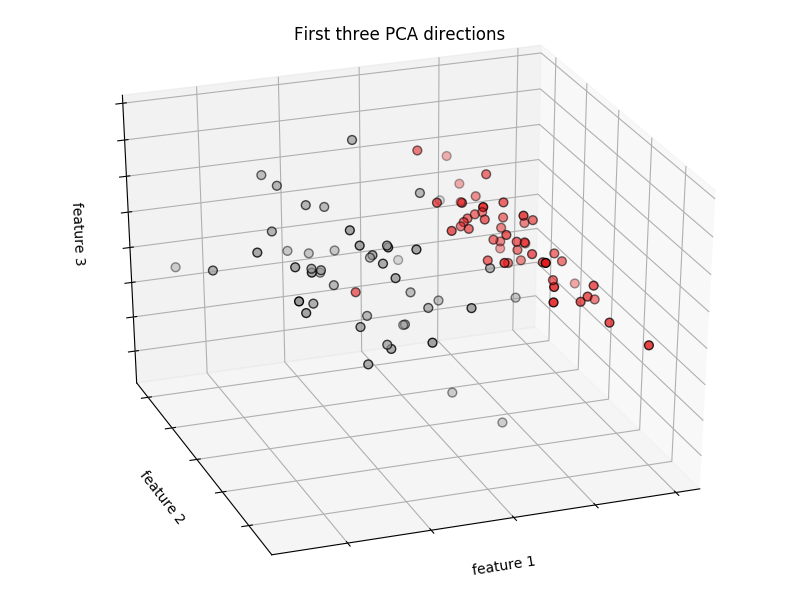

In [31]:
# Take a 3d look at it
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X['feature 1'], X['feature 2'], X['feature 3'], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("feature 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("feature 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("feature 3")
ax.w_zaxis.set_ticklabels([])

plt.show()

<IPython.core.display.Javascript object>


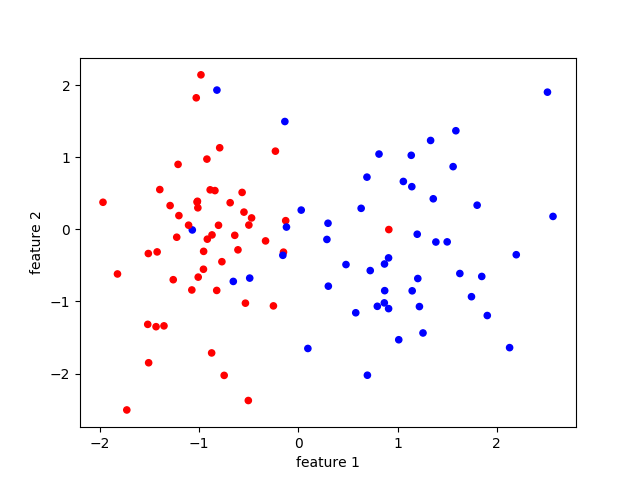

In [28]:
# Looks like feature 1 does a pretty good job compared to feature 2
X.plot.scatter('feature 1', 'feature 2', c=pd.Series(y).map({0: 'r', 1: 'b'}))

<IPython.core.display.Javascript object>


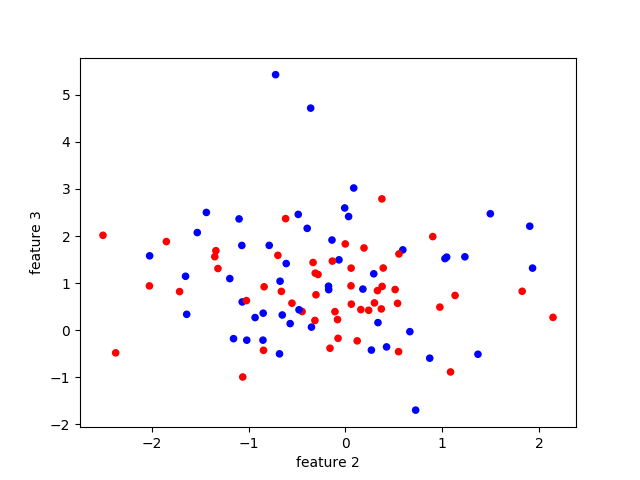

In [29]:
# Now let's check out what it looks like to plot feature 2 vs feature 3
# really not much going on here, doesn't look like either of these features
# split up the dataset very well.
X.plot.scatter('feature 2', 'feature 3', c=pd.Series(y).map({0: 'r', 1: 'b'}))

<IPython.core.display.Javascript object>


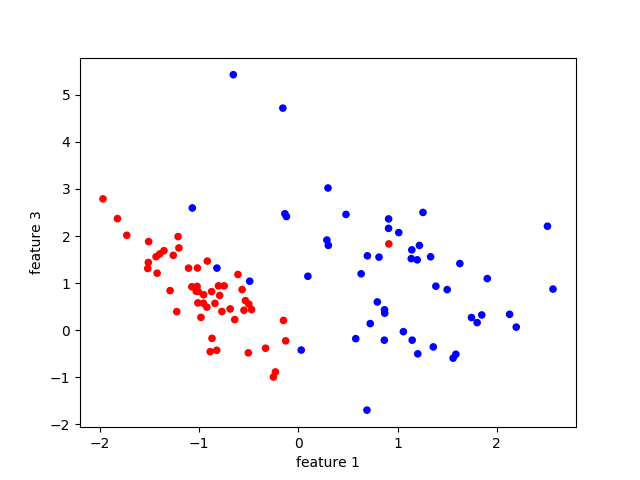

In [30]:
# alright, looks like feature 1 cuts up the space pretty well and feature
# 3 doesn't seem to be doing much
X.plot.scatter('feature 1', 'feature 3', c=pd.Series(y).map({0: 'r', 1: 'b'}))

## Now let's take a look at the logit

The logistic regression is a parametric model very similar to a linear regression.
It learns how best to divide a space using a flat plane between the two classes.

It has difficulty learning non-linear relationships. What this means is that
if you can divide two classes with a nice and clean line, the logit will do
quite well.

If there are more than one cluster per feature or there are complex interactions
between sets of features, it has a more difficult time.

However, they can generalize quite well and if your data is normally distributed
it can be a very good option.

We will go into these concepts in more depth later on.

In [39]:
# Let's do nothing special, just fit with all defaults
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### The coefficients that it learns

These coefficients can tell us a bit about how much the model is relying
on each of the features by looking at the magnitude of them

In [8]:
pd.Series(np.abs(clf.coef_[0]), index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature coefficients')

Okay so what we've seen here is that the logistic seems to be relying on feature 1 more than the others

In [9]:
# Let's do nothing special, just fit with all defaults
clf = LogisticRegression(C=0.01)
clf.fit(X, y)
pd.Series(np.abs(clf.coef_[0]), index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature coefficients')

In [10]:
# Let's do nothing special, just fit with all defaults
clf = LogisticRegression(max_iter=10000)
clf.fit(X, y)
pd.Series(np.abs(clf.coef_[0]), index=['feature 1', 'feature 2', 'feature 3']).plot.bar(title='feature coefficients')

# Look at the Decision Tree

A Decision tree is a non-parametric

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Now check out the feature importances

In [7]:
clf.feature_importances_

array([ 0.83774215,  0.01768615,  0.14457171])

In [8]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH